In [198]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns

from sklearn.metrics import homogeneity_score,completeness_score,classification_report,confusion_matrix,mean_squared_error,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)

In [199]:
# prepare data

# loop thr
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)


testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)

#print(wholeList)

In [200]:
# check shape of the data
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)


train data shape: (453, 15)
test data shape: (114, 14)


In [201]:
# check the info of the data
print('train data info:',trainData.info())
print('test data info:',testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------   

In [202]:
# check if duplicate row exist in test data and train data

print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

train data duplicated: False
test data duplicated: False


In [203]:
# check if any NaN cell
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()].isnull())


train data NaN: Index(['top genre'], dtype='object')
test data NaN: [False]


In [204]:
# filter out the NaN rows 
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataClean = trainData.drop(trainData[trainData['top genre'].isnull()].index)
#trainDataClean = trainData.copy()
testDataClean = testData.copy()
print (trainDataClean.describe())


               Id         year         bpm        nrgy        dnce          dB        live         val         dur       acous        spch         pop
count  453.000000   453.000000  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000
mean   227.000000  1991.443709  118.399558   60.070640   59.565121   -8.836645   17.757174   59.465784  226.278146   32.982340    5.660044   60.743929
std    130.914094    16.776103   25.238713   22.205284   15.484458    3.577187   13.830300   24.539868   63.770380   29.530015    5.550581   13.470083
min      1.000000  1948.000000   62.000000    7.000000   18.000000  -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   26.000000
25%    114.000000  1976.000000  100.000000   43.000000   49.000000  -11.000000    9.000000   42.000000  181.000000    7.000000    3.000000   53.000000
50%    227.000000  1994.000000  119.000000   63.000000   61.000000   -8.000000   13.000000   6

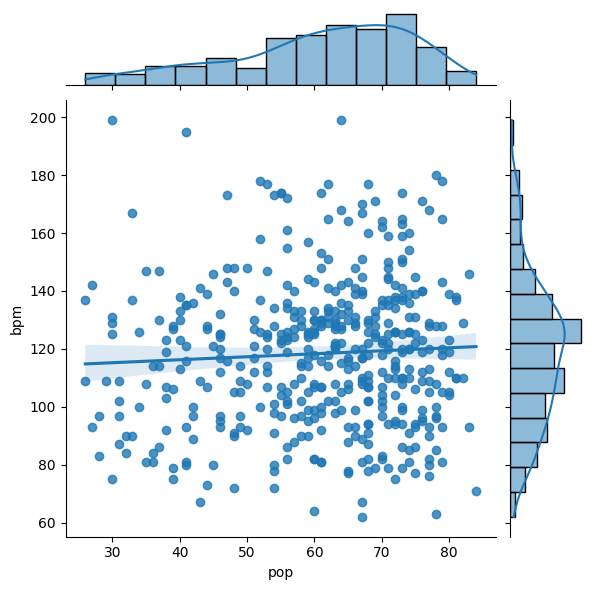

In [205]:
# Exploratory Data Analysis(EDA)
# 1)pop vs bpm
sns.jointplot(x='pop',y='bpm',data=trainDataClean,kind="reg")

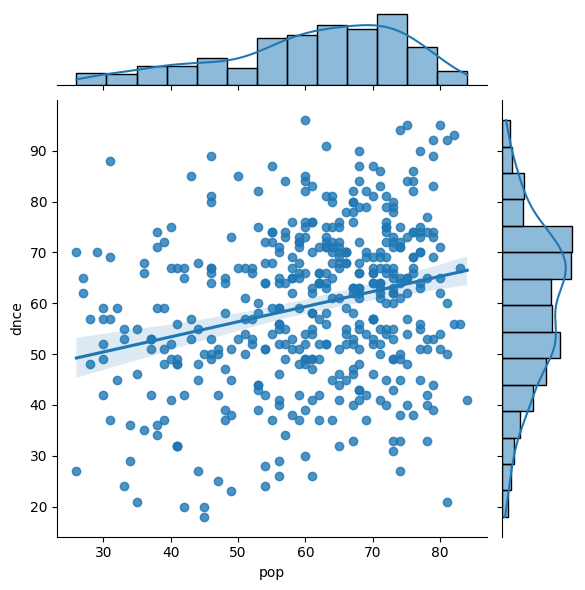

In [206]:
# 2)dnce vs pop
sns.jointplot(x='pop',y='dnce',data=trainDataClean,kind="reg")

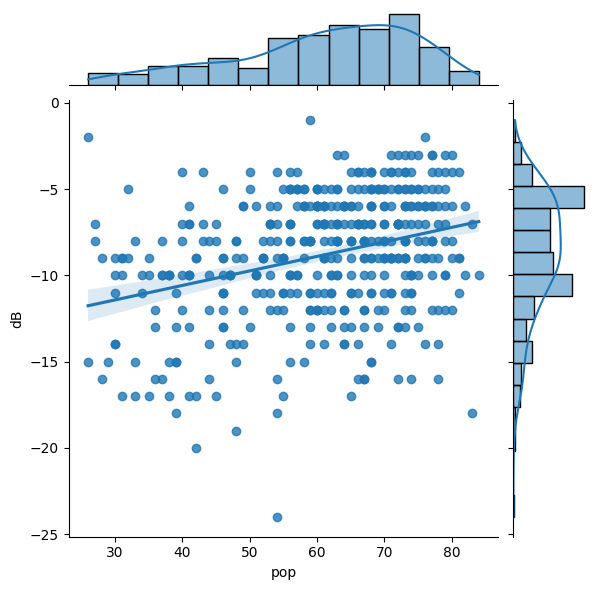

In [207]:
# 3)dB vs pop
sns.jointplot(x='pop',y='dB',data=trainDataClean,kind="reg")

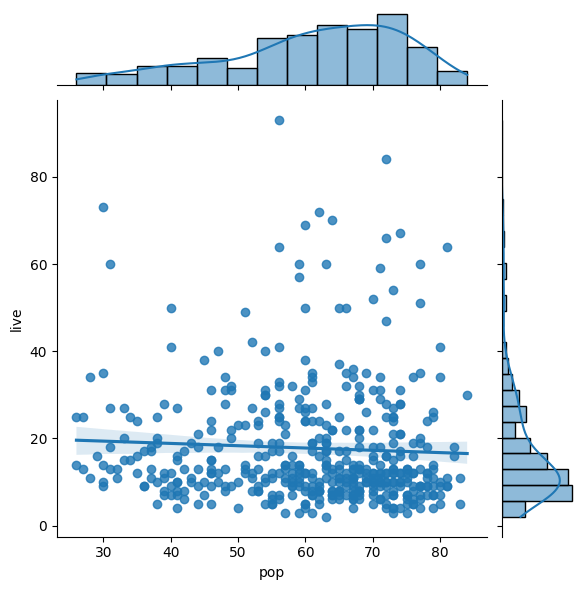

In [208]:
# 4)live vs pop
sns.jointplot(x='pop',y='live',data=trainDataClean,kind="reg")

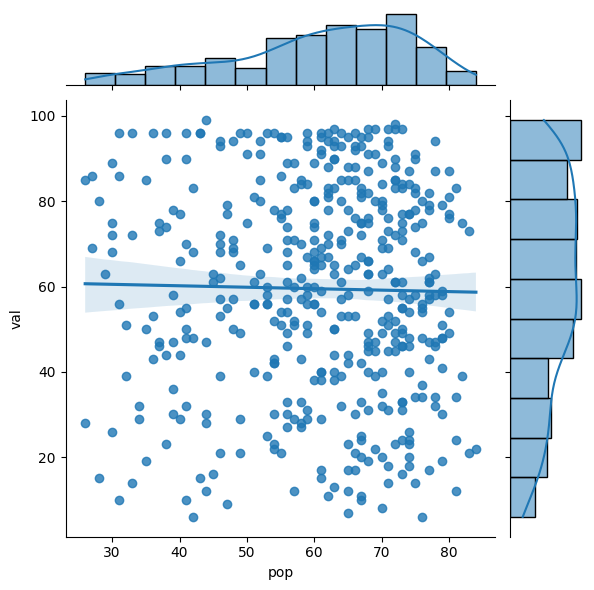

In [209]:
# 5)val vs pop
sns.jointplot(x='pop',y='val',data=trainDataClean,kind="reg")

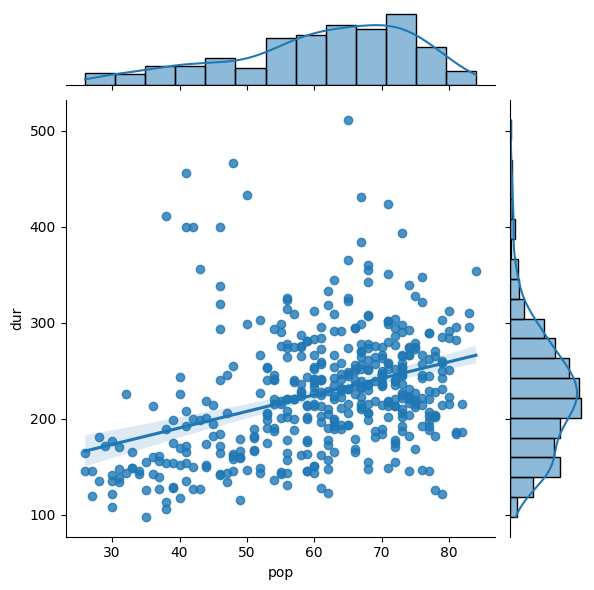

In [210]:
# 6)dur vs pop
sns.jointplot(x='pop',y='dur',data=trainDataClean,kind="reg")

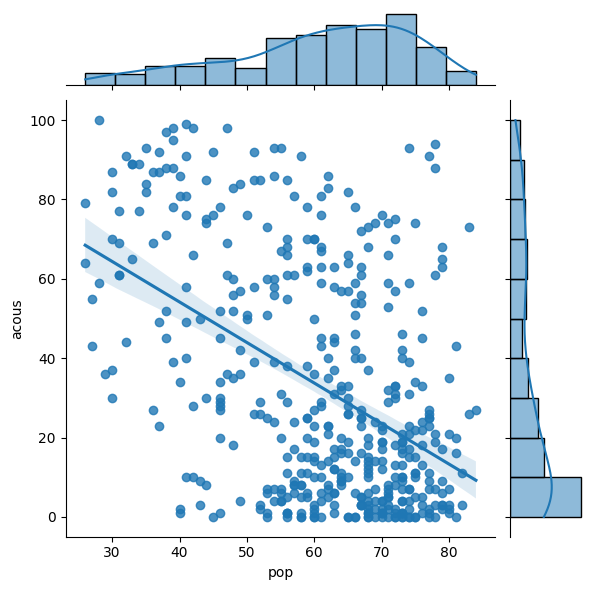

In [211]:
# 7)acous vs pop
sns.jointplot(x='pop',y='acous',data=trainDataClean,kind="reg")

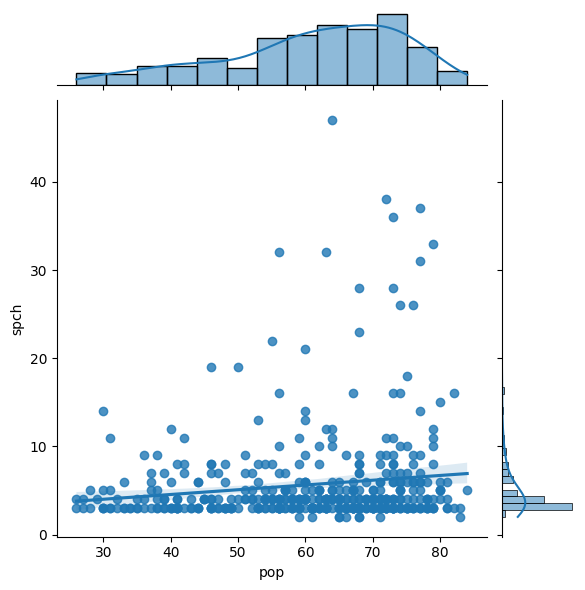

In [212]:
# 8)spch vs pop
sns.jointplot(x='pop',y='spch',data=trainDataClean,kind="reg")

In [213]:
# seperated list - train data

y = trainDataClean["pop"]
x = trainDataClean.drop(columns=["top genre","Id","artist","title","year","pop"])
dfX = pd.DataFrame(x)
stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)

# for polynomial 
polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)

# for first training - scaled
xTrain, xTrainTest, yTrain, yTrainTest = train_test_split(xScaled, y, test_size=0.25, random_state=42)


# for first training - scaled poly
xTrainPoly, xTrainPolyTest, yTrainPoly, yTrainPolyTest = train_test_split(xPolyScaled, y, test_size=0.25, random_state=42)




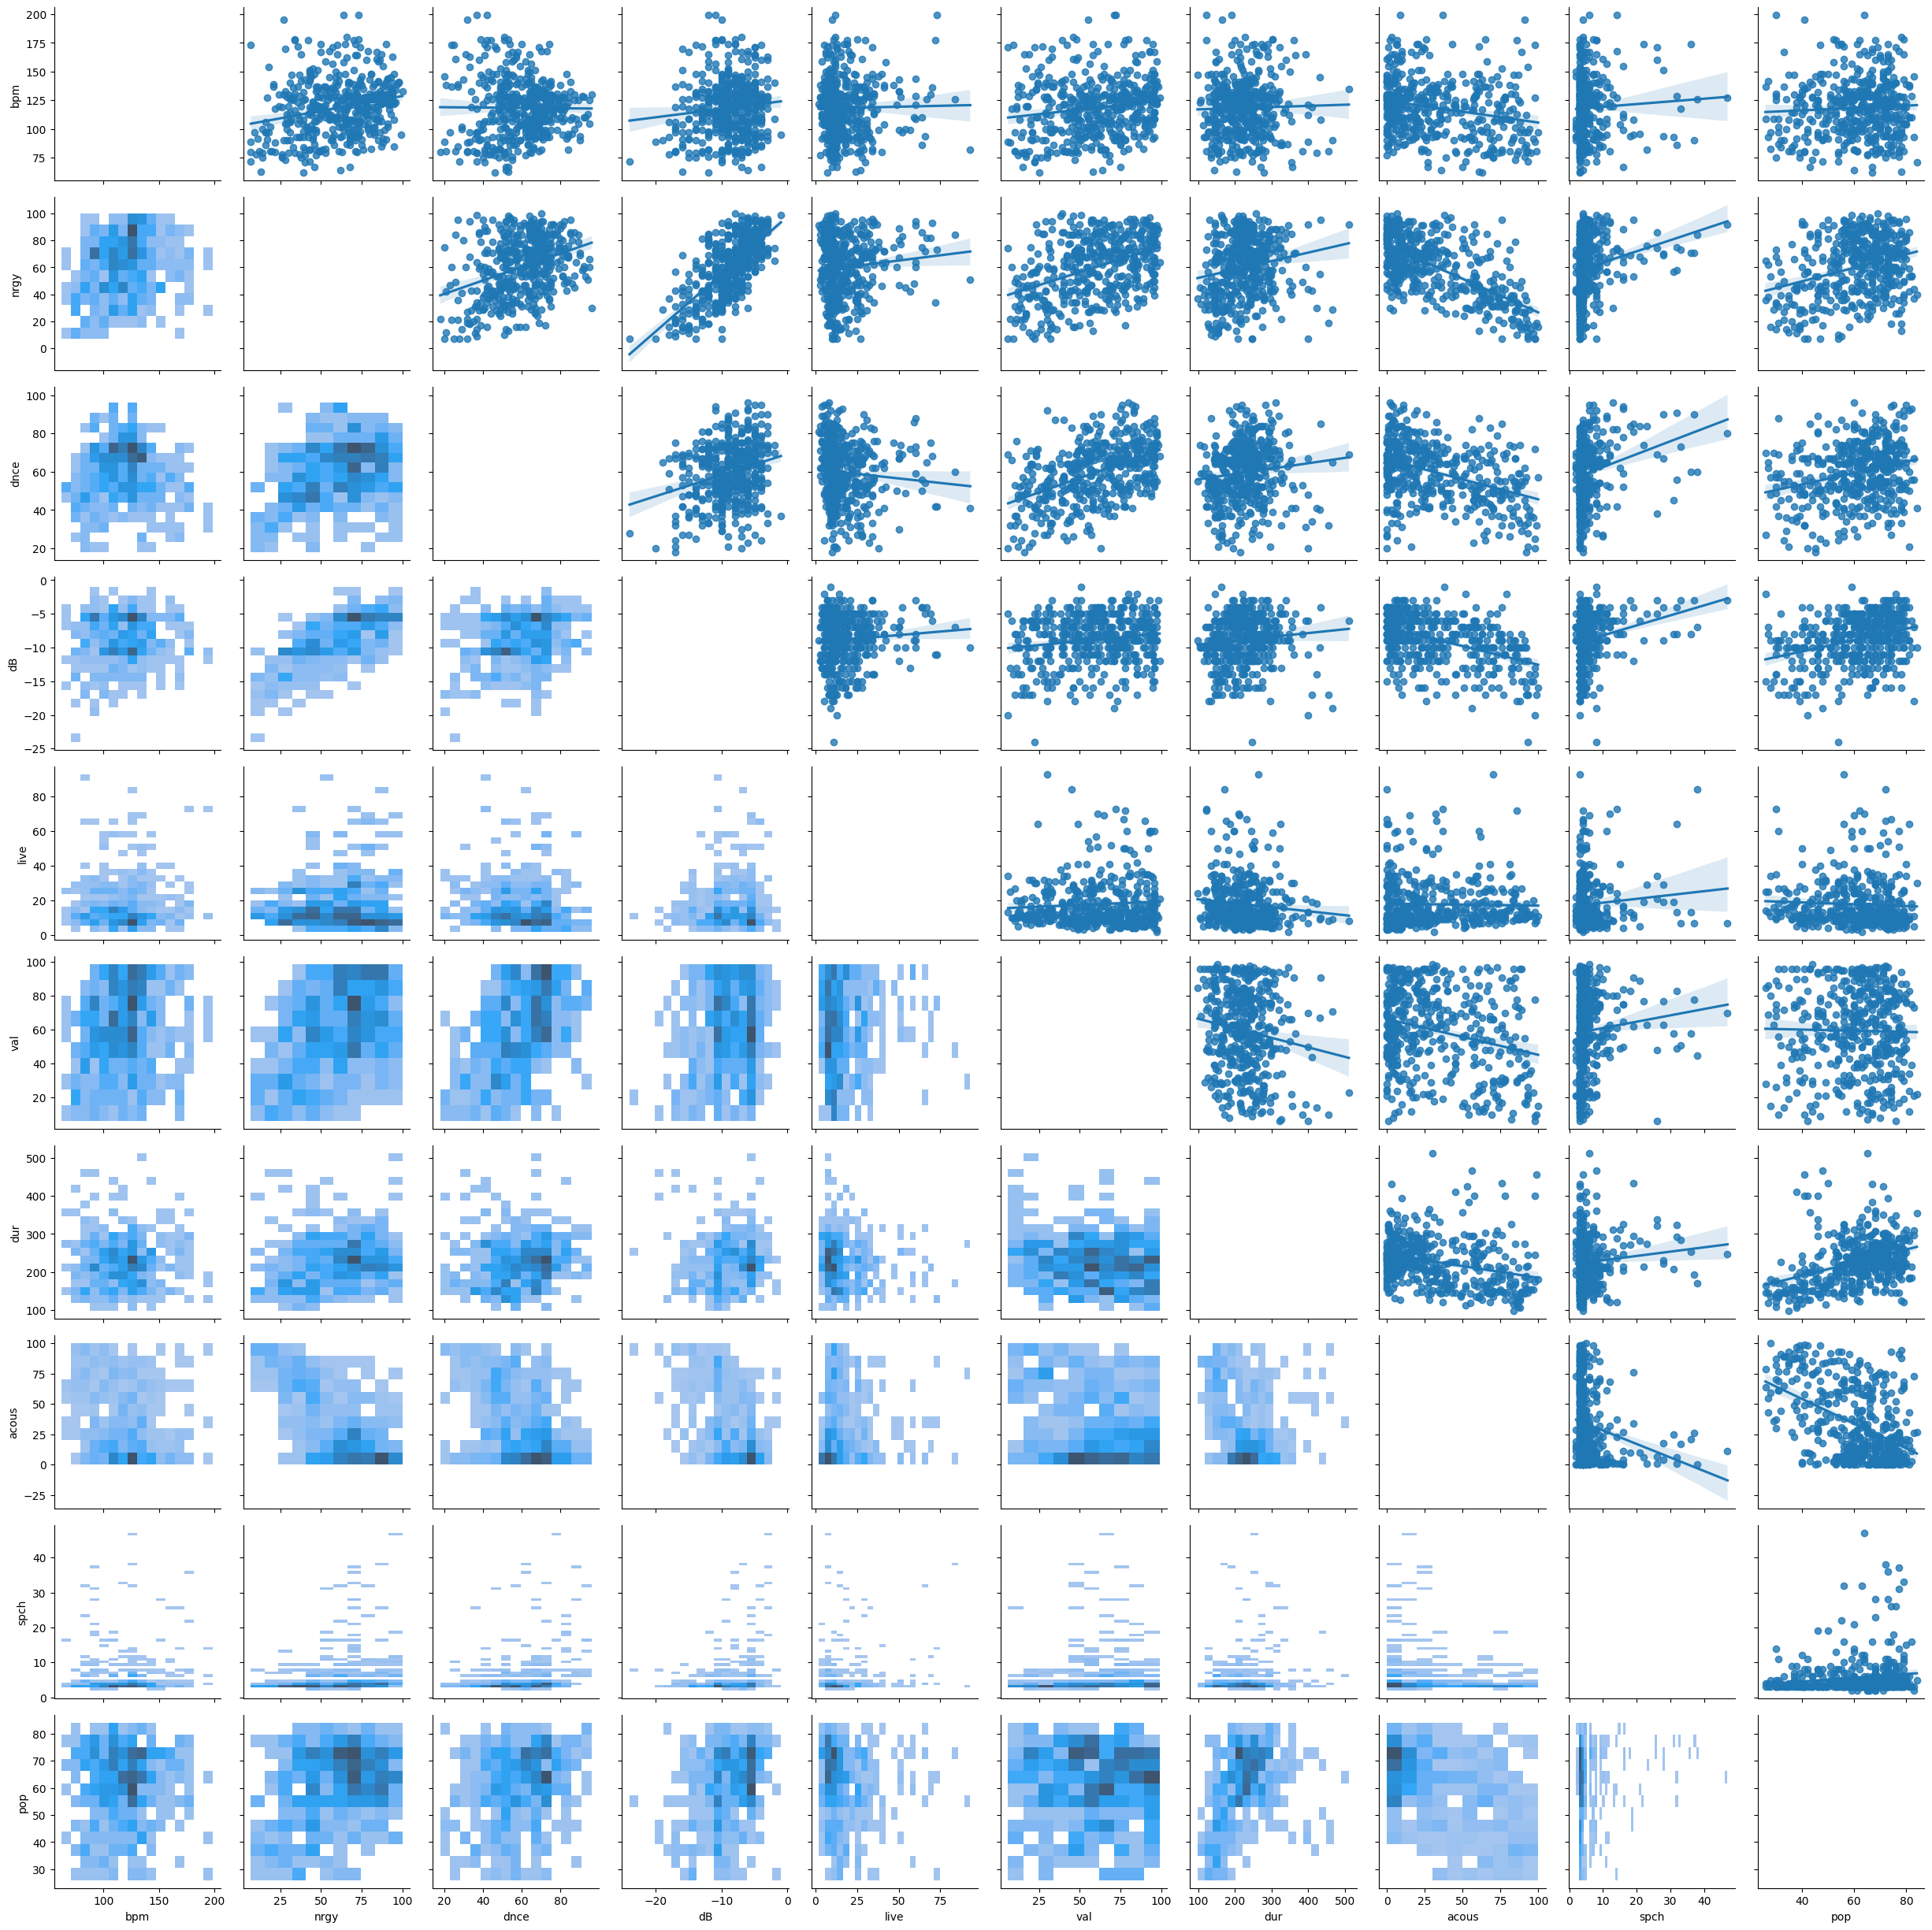

In [214]:
g = sns.PairGrid(trainDataClean.drop(columns=["top genre","Id","artist","title","year"]))

g.map_upper(sns.regplot)
g.map_lower(sns.histplot)

In [215]:
# seperate list - test data
xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year"])

stdScaler = StandardScaler()
xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyScaledTest = polyFeat.fit_transform(xTest)
xPolyScaledTest = stdScaler.fit_transform(xPolyScaledTest)

In [216]:
# 1)Decision Tree Regression
# scaled x is not applied for this sample as decision tree do not require scaling
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=5) # explore min_samples = e.g. put to 1 to see what happens
tree.fit(x,y)
predTreeTrain = tree.predict(x) # Check fit
linearMse = mean_squared_error(y, predTreeTrain)
linearRmse = np.sqrt(linearMse)
print("Tree Rmse:",linearRmse)
# Check on test set
predTreeTest = tree.predict(xTest) # Check fitpredTreeTrain
print(predTreeTest)
np.savetxt("my_data_tree.csv", predTreeTest, delimiter=",", 
           header="pop", comments="")

Tree Rmse: 6.891583887890298
[73.75       71.16666667 53.66666667 51.375      43.5        72.4
 53.66666667 37.16666667 71.16666667 62.25       43.2        60.5
 64.125      75.         73.75       55.16666667 66.8        68.4
 65.71428571 65.83333333 45.375      55.         58.         40.4
 43.2        68.5        60.5        55.         46.         76.66666667
 73.4        37.16666667 70.875      71.16666667 64.75       73.75
 52.         53.66666667 68.4        63.6        75.2        75.2
 60.5        37.16666667 75.         66.         62.25       52.
 52.14285714 64.28571429 51.11111111 75.2        53.4        40.4
 62.         70.6        72.4        62.28571429 68.42857143 62.28571429
 55.16666667 71.16666667 76.66666667 71.42857143 68.42857143 68.4
 78.4        53.66666667 52.14285714 64.125      76.66666667 62.
 53.4        63.6        62.         71.42857143 76.66666667 71.28571429
 78.4        43.2        76.66666667 73.2        58.         73.16666667
 46.         55.    

In [217]:
# 2) poly SVR
# instead of scaled x , we use scaled polynomial featured x (degree=2)as we are going to apply poly SVR(degree=2))
from sklearn.svm import SVR
svrPoly = SVR(kernel="poly", degree=2, C=100, epsilon=0.05, gamma="scale")
svrPoly.fit(xTrainPoly,yTrainPoly)
ypred = svrPoly.predict(xTrainPolyTest)
linearMse = mean_squared_error(yTrainPolyTest, ypred)
linearRmse = np.sqrt(linearMse)
print("linearRmse",linearRmse)


# Check on test set
svrPoly.fit(xPolyScaled,y)
predSVRPolyTest = svrPoly.predict(xPolyScaledTest) # Check fitpredTreeTrain
print(predSVRPolyTest)
np.savetxt("my_data_SVR.csv", predSVRPolyTest, delimiter=",", 
           header="pop", comments="")

linearRmse 12.766252990904864
[ 64.02104843  70.25385501  54.84222077  57.8977006   57.92736191
  68.85136363  57.21682121  42.40042451  65.98815919  68.71054837
  51.57764779  68.72698845  43.49825251  63.85274426  71.16852556
  63.80037295  60.34319023  63.99959079  80.87917459  63.0989473
  65.5948579   61.88112269  47.6120394   54.22188261  20.9287193
  68.66933939  59.8897934   58.97919667  48.38126874  87.43436369
  73.5906722   61.46620316  70.01955783  68.42667168  69.35217743
  84.0232138   62.82406693  50.23633253  60.81698601  66.93298865
  69.07325521  65.87999901  70.39644097  55.79983521  67.09579698
  58.20363268  66.7827439   66.21041364  66.68340615  63.23135723
  56.1501574   69.49938774  68.3323507   49.07590662  70.1167672
  61.37390532  67.36198632  48.23417605  70.38024204  37.36033735
  63.91656798  68.54347913  66.95283775  65.52483168  67.55131358
  50.1876522   78.91878126  48.27898983  65.60255546  61.46417382
  63.98869358  53.67298868  52.07594703  71.57272

In [218]:
# 3) bagging with polySVR
from sklearn.ensemble import BaggingRegressor

baggedPolySVRReg = BaggingRegressor(base_estimator=SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale"),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
baggedPolySVRReg.fit(xTrainPoly,yTrainPoly)
ypred = baggedPolySVRReg.predict(xTrainPolyTest)
linearMse = mean_squared_error(yTrainPolyTest, ypred)
linearRmse = np.sqrt(linearMse)
print("linearRmse",linearRmse)

# Check on test set
baggedPolySVRReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedPolySVRReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_SVR.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

linearRmse 12.386672633934195
[63.19068262 68.01444965 58.81694447 58.92712126 57.39564353 67.97891417
 58.92041678 39.33623573 66.23074451 69.7964427  54.27041445 71.98037597
 49.82054285 63.16369538 68.54865185 64.02085089 61.71815779 64.62206381
 80.96096884 65.19169164 65.93857409 65.96074135 46.36864642 52.07512974
 34.5722005  69.13428321 60.77854381 58.83373659 49.35671194 86.61176555
 74.50965455 61.55588908 69.9891373  67.10811904 69.80830965 83.84536057
 62.47734729 55.16130989 61.47113825 66.70954284 69.33552923 60.31331062
 71.3456508  54.42542792 66.53587284 59.14907468 62.54226403 49.7865755
 65.68213969 64.07897114 55.15334646 68.92159509 68.8162917  49.3760683
 70.04769302 56.44189308 67.79580149 48.37168869 71.04294362 43.02735198
 63.69040872 69.1881374  67.90815468 65.20875599 70.14810266 46.52314231
 69.76315248 53.44314519 64.91897607 64.38929778 67.16460171 53.36866109
 50.15109541 66.73449372 62.82749381 76.09025553 73.4233238  72.23773274
 68.65394078 55.7672643

In [219]:
# 3) bagging with randomForest

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

baggedRFReg = BaggingRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
baggedRFReg.fit(xTrain,yTrain)
ypred = baggedRFReg.predict(xTrainTest)
linearMse = mean_squared_error(yTrainTest, ypred)
linearRmse = np.sqrt(linearMse)
print("linearRmse",linearRmse)

# Check on test set
baggedRFReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedRFReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_SVR.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

linearRmse 11.341817538819159
[67.51266631 63.83173448 56.67398179 61.84291144 50.17651722 66.02407415
 58.53049385 41.0850396  67.97852855 66.30639077 58.18016112 68.00462502
 54.15366085 64.83886669 66.53736996 64.30748661 60.69625816 63.4472632
 65.79516061 67.11501415 55.4249395  57.90822793 49.25780583 47.27809251
 51.8740812  66.81631702 62.14869912 56.8148675  43.19648686 71.25038453
 68.40609004 53.06096965 65.90840862 69.71494647 66.27783695 70.06617928
 63.20740706 56.99705511 63.38903354 67.46908391 67.78449527 62.27500169
 65.25318651 46.32655748 63.56711393 60.4767411  64.32625389 58.0030499
 63.37196104 63.05606759 49.58139585 65.98370401 59.11668141 48.7045691
 63.77511963 57.56405732 67.27632968 49.34713905 69.92468699 43.67829155
 62.04785207 66.92951749 66.29129188 64.73966461 69.0017701  61.38916862
 66.50685849 56.3021044  62.25557169 57.608623   66.48761033 56.33754157
 55.33226295 63.0418701  59.84677879 67.99025969 68.55538352 64.97340579
 61.68799416 56.65781925

In [220]:
rf = RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1)
rf.fit(xScaled,y)
rf.feature_importances_

array([0.0719245 , 0.09900987, 0.06232091, 0.08738791, 0.04278202,
       0.05775668, 0.43424178, 0.10672394, 0.03785238])

In [221]:
# 4) Gradient Boosting Regressor
# train data
from sklearn.ensemble import GradientBoostingRegressor
gradBoostReg = GradientBoostingRegressor(random_state=0)
gradBoostReg.fit(xTrain,yTrain)
ypred = gradBoostReg.predict(xTrainTest)
linearMse = mean_squared_error(yTrainTest, ypred)
linearRmse = np.sqrt(linearMse)
print("linearRmse",linearRmse)

# test data
gradBoostReg.fit(xScaled,y)
predGradBoostReg = gradBoostReg.predict(xScaledTest)     
print(predGradBoostReg)
np.savetxt("my_data_grad_boost.csv", predGradBoostReg, delimiter=",", 
           header="pop", comments="")

linearRmse 12.008764217598543
[67.57074593 70.74136107 54.39296956 61.92475847 53.80130238 66.41916715
 55.98978361 39.1567117  65.08412787 59.71118385 59.35155204 62.23086291
 57.07436529 59.39737343 68.02951546 63.17144291 60.70246798 61.36676288
 64.66406072 67.0561283  51.97818094 53.75645178 50.86392106 43.91571353
 56.635114   68.38105206 62.40416734 51.84641765 47.72227453 69.69042907
 66.44036354 51.00926029 67.42284647 68.13186536 65.5897164  75.9009348
 64.56543176 54.7403073  63.8678659  67.89061023 66.98624425 61.67391628
 66.85899358 43.88649972 68.11440887 62.42172626 62.03511004 58.00956087
 58.76557084 63.52555854 51.37640469 63.95913082 65.73139196 44.61449815
 67.19816678 63.36981408 68.37142443 57.07678931 67.68985969 48.29521702
 65.1471264  68.62112603 65.29264334 69.41815177 69.33706104 63.97659957
 71.31226626 67.79805898 63.97301373 65.86446096 67.82440474 54.95565615
 55.50891296 63.64746779 51.74878519 66.37478546 72.97832575 65.7195818
 62.81690711 50.2762563